<a id='top'></a>

# Insurance Fraud Detection 

__Table of contents__

1. [Initial Data Analysis](#EDA1)
2. [Data Preprocessing](#DataPrep)
3. [Deep Data Analysis](#EDA2)
4. [Train Test Split](#split)

<a id='EDA1'></a>

### Initial Data Analysis

Import libraries

In [48]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

print('The pandas version is {}.'.format(pd.__version__))
print('The numpy version is {}.'.format(np.__version__))
print('The sklearn version is {}.'.format(sklearn.__version__))

The pandas version is 1.1.4.
The numpy version is 1.19.1.
The sklearn version is 0.23.2.


Import data

In [2]:
master_df = pd.read_csv("../data/insuranceFraud.csv")

In [3]:
df = master_df.copy()

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
data_description = pd.DataFrame()

data_description['data type'] = df.dtypes
data_description['unique count'] = df.nunique()
data_description[" '?' count"] = df.isin(['?']).sum(axis=0)

data_description

,data type,unique count,'?' count
months_as_customer,int64,391,0
age,int64,46,0
policy_number,int64,1000,0
policy_bind_date,object,951,0
policy_state,object,3,0
policy_csl,object,3,0
policy_deductable,int64,3,0
policy_annual_premium,float64,991,0
umbrella_limit,int64,11,0
insured_zip,int64,995,0


[Back to top](#top)

<a id='DataPrep'></a>

### Data Preprocessing

Replace the special value "?" with a null value

In [6]:
df = df.replace("?", np.nan)

Drop columns which are unnecessary to the prediction

In [7]:
cols_to_drop = ['policy_number', 'policy_bind_date', 'policy_state',
                'insured_zip', 'incident_location', 'incident_date', 
                'incident_state', 'incident_city', 'insured_hobbies', 
                'auto_make', 'auto_model', 'auto_year']

df.drop(columns = cols_to_drop, axis = 1, inplace = True)

In [8]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


Missing value check

In [9]:
data_description = pd.DataFrame()

data_description['data type'] = df.dtypes
data_description['unique count'] = df.nunique()
data_description['missing values'] = df.isnull().sum()

data_description

,data type,unique count,missing values
months_as_customer,int64,391,0
age,int64,46,0
policy_csl,object,3,0
policy_deductable,int64,3,0
policy_annual_premium,float64,991,0
umbrella_limit,int64,11,0
insured_sex,object,2,0
insured_education_level,object,7,0
insured_occupation,object,14,0
insured_relationship,object,6,0


Missing values are categorical features. Hence a categorical (mode) imputer will be used.

In [10]:
imputer = SimpleImputer(strategy = 'most_frequent')

for i in data_description[data_description['missing values'] != 0].index.tolist():
    
    df[i] = imputer.fit_transform(df[[i]])
    print("Missing value count for", i,": ", df[i].isnull().sum())

Missing value count for collision_type :  0
Missing value count for property_damage :  0
Missing value count for police_report_available :  0


### Encode categorical features

In [11]:
cat_df = df.select_dtypes(include = ['object']).copy()

cat_df.columns.to_list()

['policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'property_damage',
 'police_report_available',
 'fraud_reported']

In [12]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N


In [13]:
print("Unique values for all categorical features:\n")

for i in cat_df:
    print({i:cat_df[i].unique().tolist()}, "\n")

Unique values for all categorical features:

{'policy_csl': ['250/500', '100/300', '500/1000']} 

{'insured_sex': ['MALE', 'FEMALE']} 

{'insured_education_level': ['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College', 'JD']} 

{'insured_occupation': ['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces', 'tech-support', 'prof-specialty', 'other-service', 'priv-house-serv', 'exec-managerial', 'protective-serv', 'transport-moving', 'handlers-cleaners', 'adm-clerical', 'farming-fishing']} 

{'insured_relationship': ['husband', 'other-relative', 'own-child', 'unmarried', 'wife', 'not-in-family']} 

{'incident_type': ['Single Vehicle Collision', 'Vehicle Theft', 'Multi-vehicle Collision', 'Parked Car']} 

{'collision_type': ['Side Collision', 'Rear Collision', 'Front Collision']} 

{'incident_severity': ['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage']} 

{'authorities_contacted': ['Police', 'None', 'Fire', 'Other', 'Ambulance']} 

{'property_damage': ['YES',

A custom mapping technique is used to encode the categorical variables. Domain convention and judgement has dictated the specific value assignments.

In [14]:
cat_df['policy_csl'] = cat_df['policy_csl'].map({'100/300' : 1, '250/500' : 2.5, '500/1000' : 5})
cat_df['insured_education_level'] = cat_df['insured_education_level'].map({'High School' : 1, 'Associate' : 2, 'College' : 3, 'JD' : 4, 'Masters' : 5, "MD": 6, "PhD": 7})
cat_df['incident_severity'] = cat_df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2, 'Major Damage' : 3, 'Total Loss' : 4})
cat_df['insured_sex'] = cat_df['insured_sex'].map({'MALE' : 0, 'FEMALE' : 1})
cat_df['property_damage'] = cat_df['property_damage'].map({'NO' : 0, 'YES' : 1})
cat_df['police_report_available'] = cat_df['police_report_available'].map({'NO' : 0, 'YES' : 1})
cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'N' : 0, 'Y' : 1})

Auto encoding of categorical features which were not manually encoded above.

In [15]:
for i in cat_df.drop(columns = ['policy_csl', 'insured_education_level', 'incident_severity', 'insured_sex', 'property_damage', 'police_report_available', 'fraud_reported']):
    
    cat_df = pd.get_dummies(cat_df, columns = [i], prefix = [i], drop_first = True)

In [16]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,2.5,0,6,3,1,1,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,2.5,0,6,2,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,1.0,1,7,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2.5,1,7,3,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5.0,0,2,2,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


##### Extract numerical features

In [17]:
num_df = df.select_dtypes(include = ['int64']).copy()

In [18]:
num_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


##### Combine numerical and categorical features

In [19]:
full_df = pd.concat([num_df, cat_df], axis = 1)

full_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,53300,0,5,1,1,2,...,0,0,1,0,0,1,0,0,0,1
1,228,42,2000,5000000,0,0,8,1,0,0,...,0,0,0,1,1,0,0,0,0,1
2,134,29,2000,5000000,35100,0,7,3,2,3,...,0,0,0,0,1,0,0,0,0,1
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,0,0,1,0,0,0,0,0,0,1
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,0,0,0,1,1,0,0,1,0,0


##### Isolating target from features

In [20]:
x = full_df.drop('fraud_reported', axis = 1)
y = full_df[['fraud_reported']]

print(x.shape)
print(y.shape)

(1000, 47)
(1000, 1)


[Back to top](#top)

<a id='EDA2'></a>

### Deep Data Analysis

In [21]:
%matplotlib inline

(array([349.,   0.,   0., 351.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

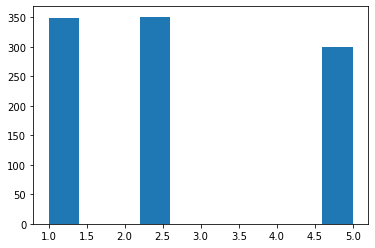

In [22]:
plt.hist(x['policy_csl'])

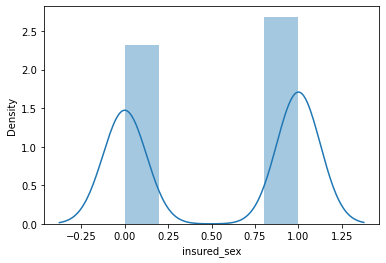

In [23]:
sns.distplot(x['insured_sex'])

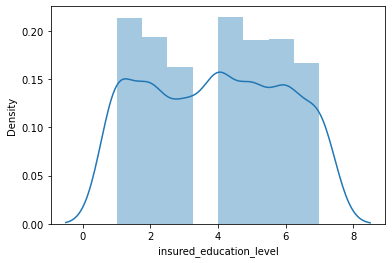

In [24]:
sns.distplot(x['insured_education_level'])

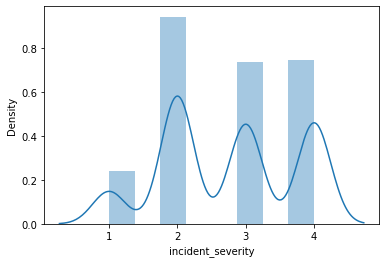

In [25]:
sns.distplot(x['incident_severity'])

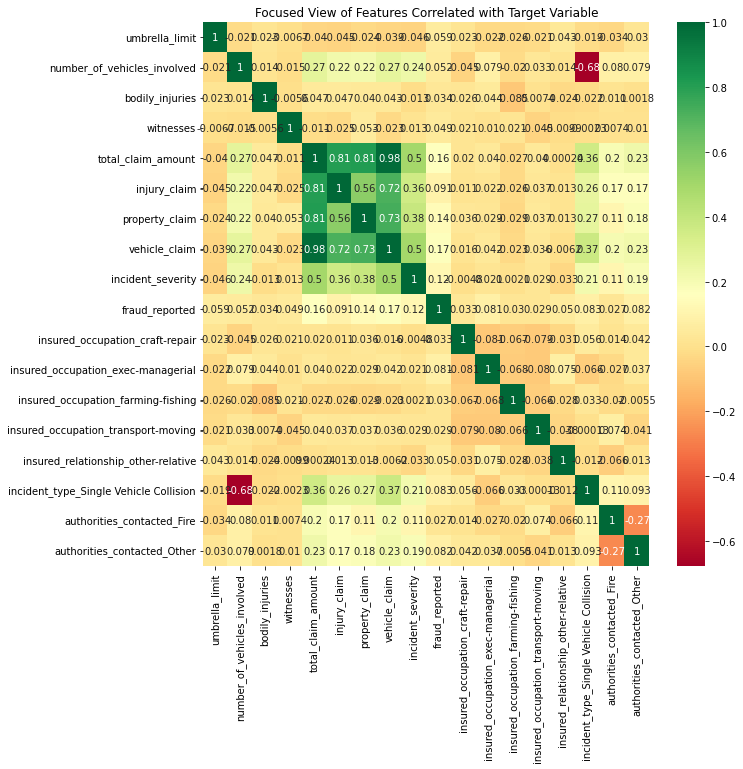

In [45]:
corrmatrix = full_df.corr()

# Focused view of features correlated with target variable
corrmat_focused = corrmatrix.index[(corrmatrix['fraud_reported'])>0.025]
plt.figure(figsize = (10, 10))
plt.title('Focused View of Features Correlated with Target Variable')
sns.heatmap(full_df[corrmat_focused].corr(),cmap = 'RdYlGn', annot = True)

In addition to observing features with predictive power, we can see that there is redundancy in the feature (highly correlated X columns). We will drop these redundant features. 

In [47]:
x.drop(columns = ['age', 'total_claim_amount'], inplace = True)

[Back to top](#top)

<a id='split'></a>

### Train Test Split

In [53]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 42)

print("X train:",train_x.shape,
      "\nX test:\t",test_x.shape,
      "\nY train:",train_y.shape,
      "\nY test:\t",test_y.shape)

X train: (750, 45) 
X test:	 (250, 45) 
Y train: (750, 1) 
Y test:	 (250, 1)


Save preprocessed train and test data. 

In [54]:
train_x.to_csv("../Data/train_x.csv")
test_x.to_csv("../Data/test_x.csv")
train_y.to_csv("../Data/train_y.csv")
test_y.to_csv("../Data/test_y.csv")

[Back to top](#top)